### Task 1: Data Preparation

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('heart_disease.csv')

In [87]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0,63,1,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,1,41,1,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,2,57,1,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,3,52,1,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,4,57,1,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


##### Data Description

- age: Age in years
- sex: Gender; Male - 1, Female - 0
- cp: Chest pain type
- trestbps: Resting Blood Pressure
- chol: Cholesterol Measure
- fbs: Fasting Blood Sugar > 120mg/dl (1-True, 0-False)
- restecg: ecg observations at resting condition, Value 0: Normal, Value 1: Having STT wave - abnormality, Value 2: Showing probable or definite left ventricular hypertrophy.
- thalach: Maximum Heart rate achieved
- exang: exercised induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercises ST segment
- thal: Thal
- num: Target (0: No Heart Disease, 1,2,3,4: Stages of Heart Disease)

### Task 2: Exploratory Data Analysis

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  908 non-null    int64  
 1   age         908 non-null    int64  
 2   sex         908 non-null    int64  
 3   cp          908 non-null    object 
 4   trestbps    908 non-null    int64  
 5   chol        908 non-null    int64  
 6   fbs         908 non-null    bool   
 7   restecg     908 non-null    object 
 8   thalch      908 non-null    int64  
 9   exang       908 non-null    object 
 10  oldpeak     908 non-null    float64
 11  slope       908 non-null    object 
 12  thal        908 non-null    object 
 13  num         908 non-null    int64  
dtypes: bool(1), float64(1), int64(7), object(5)
memory usage: 93.2+ KB


In [89]:
df.describe()

,Unnamed: 0,age,sex,trestbps,chol,thalch,oldpeak,num
count,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,453.50000,53.791850,0.790749,133.430617,201.484581,135.957048,0.864537,1.008811
std,262.26132,9.158031,0.406998,20.401608,112.097949,26.804929,1.060433,1.144436
min,0.00000,29.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,226.75000,47.750000,1.000000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,453.50000,54.000000,1.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,680.25000,60.000000,1.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,907.00000,77.000000,1.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [90]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
thal          0
num           0
dtype: int64

<Axes: xlabel='sex', ylabel='count'>

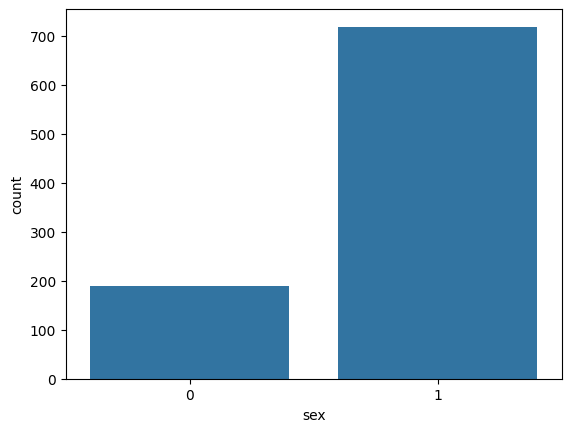

In [91]:
sns.countplot(df, x='sex')

In [92]:
df.cp.unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

<Axes: xlabel='cp', ylabel='count'>

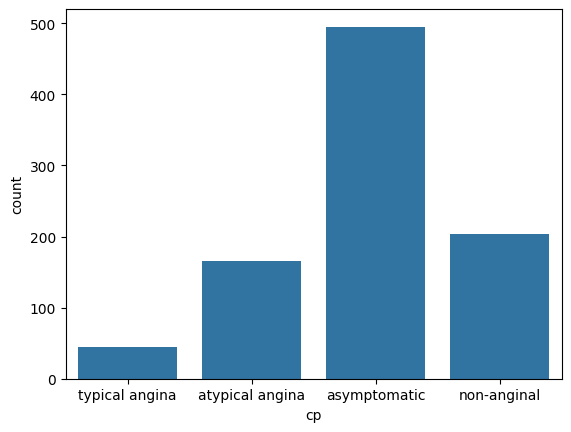

In [93]:
sns.countplot(df, x='cp')

In [94]:
df['cp'].value_counts()

cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64

- Typical Angina: is chest pain or discomfort that occurs when the heart muscle doesn't get enough oxygen-rich blood. It's often described as a squeezing, pressure, heaviness, or tightness in the chest.

- Atypical Angina: chest pain that doesn't fully fit the typical description of angina (chest pain or discomfort due to reduced blood flow to the heart) and may manifest as sharp, stabbing, or burning pain, or even as indigestion-like discomfort.

- Non-anginal: chest pain that is not caused by reduced blood flow to the heart, which is a symptom of coronary artery disease.

- Asymptomatic: refers to coronary artery disease (CAD) where the heart muscle experiences reduced blood flow (ischemia) without the typical chest pain or discomfort associated with angina.

In [95]:
df.restecg.value_counts()

restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64

<Axes: xlabel='restecg', ylabel='count'>

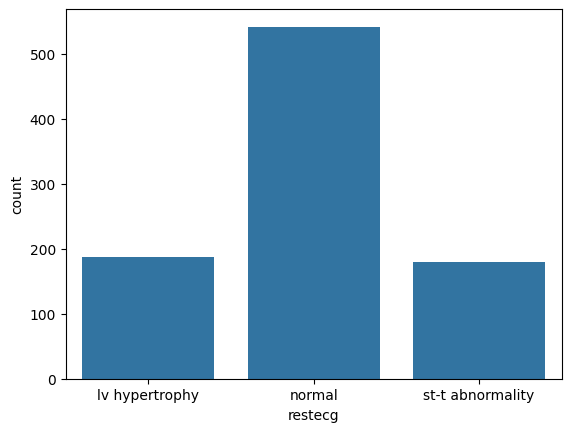

In [96]:
sns.countplot(df, x='restecg')

- ST-T abnormalities indicate preclinical cardiac damage or increased risk of cardiovascular events.

- IVS hypertrophy, or interventricular septum hypertrophy, refers to the thickening of the muscular wall (interventricular septum) that separates the heart's two lower chambers (left and right ventricles). This thickening can be a sign of increased workload on the heart, potentially due to conditions like high blood pressure or heart valve problems.

In [97]:
df.sex.unique()

array([1, 0])

In [98]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


In [99]:
df.oldpeak.median()

np.float64(0.5)

<Axes: >

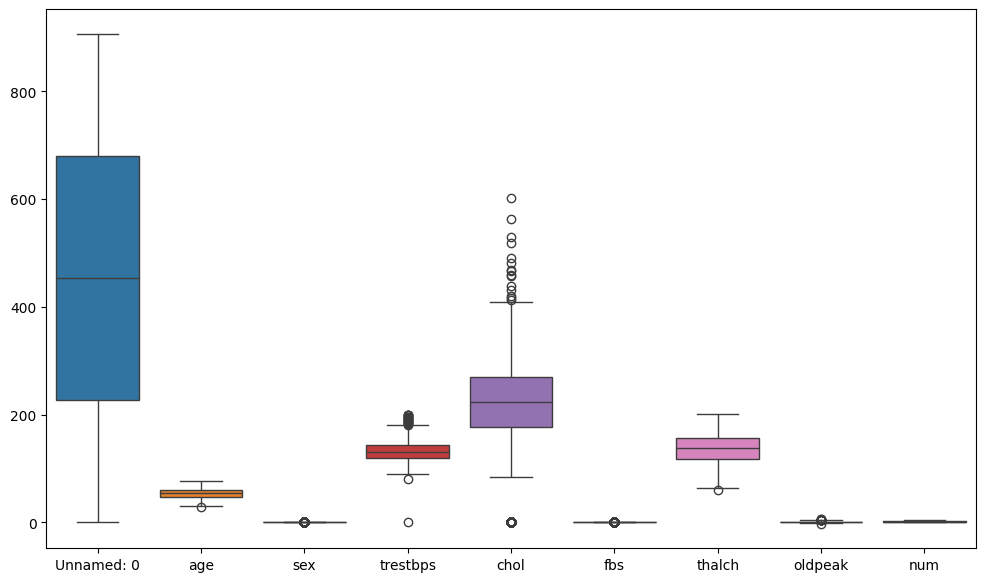

In [100]:
plt.figure(figsize=(12,7))
sns.boxplot(df)

<Axes: xlabel='oldpeak', ylabel='Count'>

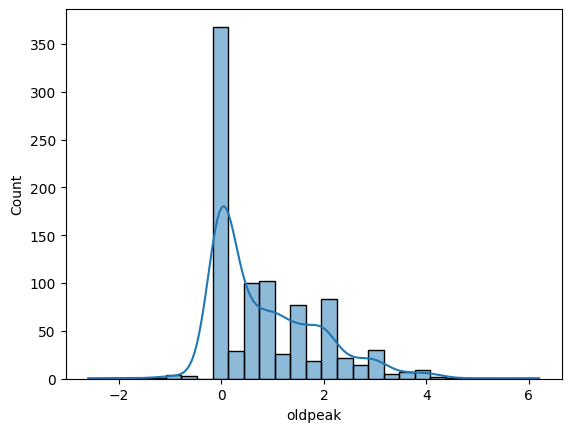

In [101]:
sns.histplot(df, x='oldpeak', kde=True)

In [102]:
df.fillna({'oldpeak': df.oldpeak.median()}, inplace=True)

In [103]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
thal          0
num           0
dtype: int64

<Axes: xlabel='num', ylabel='count'>

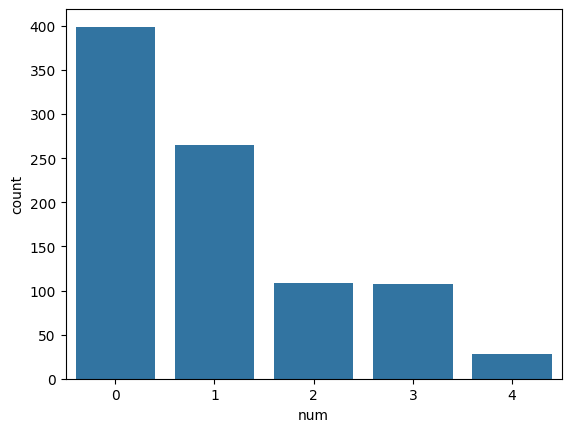

In [104]:
sns.countplot(df, x = 'num')

In [105]:
df.num.value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

### Task 3: Feature Engineering

In [106]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0,63,1,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,1,41,1,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,2,57,1,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,3,52,1,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,4,57,1,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [108]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0,63,1,3,145,233,True,0,150,False,2.3,0,0,0
1,1,41,1,1,135,203,False,1,132,False,0.0,1,0,0
2,2,57,1,0,140,192,False,1,148,False,0.4,1,0,0
3,3,52,1,3,118,186,False,0,190,False,0.0,1,0,0
4,4,57,1,0,110,201,False,1,126,True,1.5,1,0,0


In [109]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int64  
 2   cp        908 non-null    int64  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    int64  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    int64  
 11  thal      908 non-null    int64  
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(10), object(1)
memory usage: 86.1+ KB


In [111]:
df.exang.unique()

array(['False', 'True', 'FALSE', 'TURE'], dtype=object)

In [112]:
df.replace({'exang': {'FALSE': 'False', 'TURE': 'True'}}, inplace=True)

In [113]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,False,2.3,0,0,0
1,41,1,1,135,203,False,1,132,False,0.0,1,0,0
2,57,1,0,140,192,False,1,148,False,0.4,1,0,0
3,52,1,3,118,186,False,0,190,False,0.0,1,0,0
4,57,1,0,110,201,False,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,False,1.5,2,2,4
904,62,1,0,166,170,False,2,120,True,3.0,1,2,4
905,56,1,2,170,0,False,0,123,True,2.5,0,1,4
906,56,1,2,144,208,True,2,105,True,0.5,0,0,4


In [114]:
df.exang.unique()

array(['False', 'True'], dtype=object)

In [117]:
df.replace({'exang': {'False': 0, 'True': 1}}, inplace=True)

/var/folders/y9/54zzfyhs7f72c0_0zfrb98yr0000gn/T/ipykernel_18973/2000843432.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'exang': {'False': 0, 'True': 1}}, inplace=True)


In [118]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0


### Task 4: Decision Tree Classification

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [120]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [121]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,True,0,150,0,2.3,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [124]:
from sklearn import tree

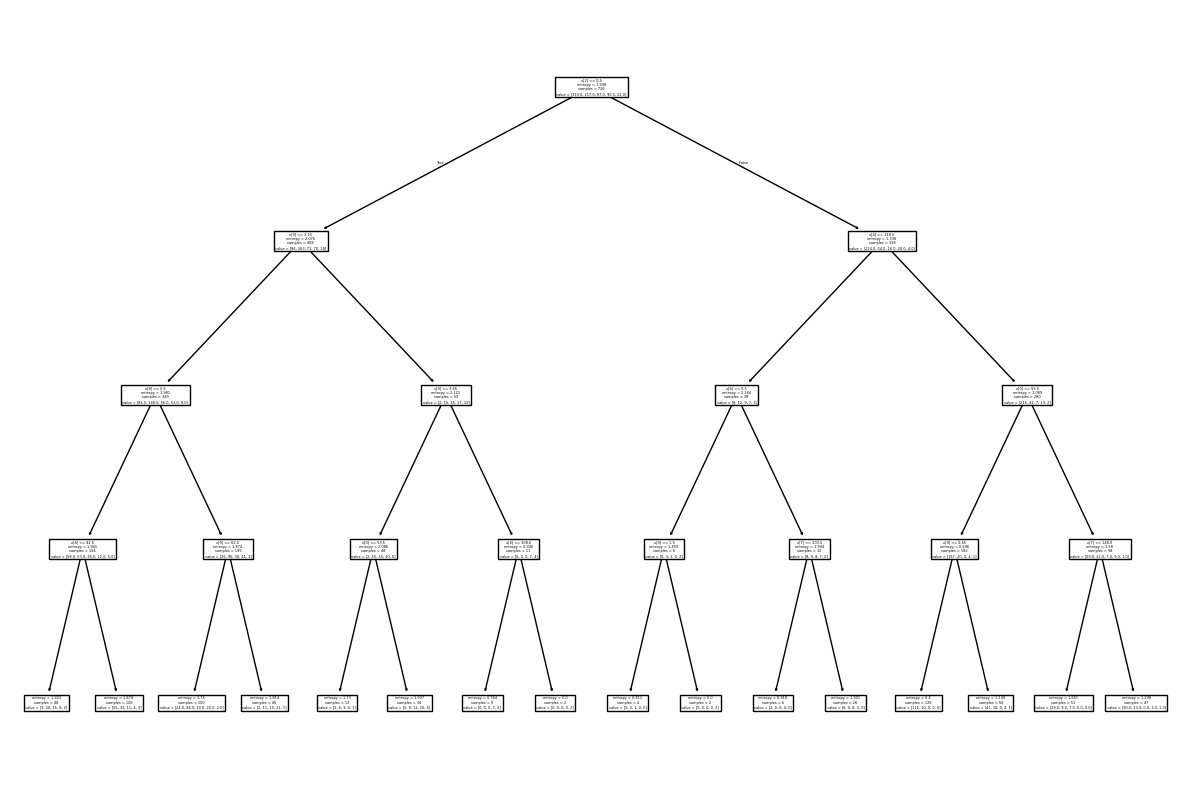

In [125]:
plt.figure(figsize=(15,10))
tree.plot_tree(model);

In [126]:
model.feature_importances_

array([0.14423648, 0.        , 0.35688232, 0.        , 0.18725804,
       0.        , 0.02560492, 0.04790706, 0.0714636 , 0.16664757,
       0.        , 0.        ])

In [127]:
fn = list(df.columns)

In [128]:
fn.remove('num')

In [129]:
fn

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal']

In [130]:
imp_features = pd.Series(model.feature_importances_, index=fn).sort_values(ascending=False)
imp_features

cp          0.356882
chol        0.187258
oldpeak     0.166648
age         0.144236
exang       0.071464
thalch      0.047907
restecg     0.025605
sex         0.000000
trestbps    0.000000
fbs         0.000000
slope       0.000000
thal        0.000000
dtype: float64

In [131]:
y_pred = model.predict(X_test)

In [132]:
from sklearn.metrics import classification_report

In [133]:
cr = classification_report(y_true=y_test, y_pred=y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        89
           1       0.39      0.44      0.41        48
           2       0.25      0.09      0.13        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.27      0.28      0.26       182
weighted avg       0.47      0.54      0.50       182



In [134]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2,3,4
num,,,,,
0,76,10,1,1,1
1,20,21,2,5,0
2,5,11,2,4,0
3,6,9,2,0,0
4,2,3,1,0,0


In [135]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [136]:
model_gini.feature_importances_

array([0.11831541, 0.02731002, 0.44518954, 0.04967817, 0.20711073,
       0.        , 0.        , 0.02171245, 0.09196495, 0.03871874,
       0.        , 0.        ])

In [137]:
pred = model_gini.predict(X_test)

In [138]:
cr2 = classification_report(y_test, pred)
print(cr2)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        89
           1       0.45      0.48      0.46        48
           2       0.33      0.14      0.19        22
           3       0.21      0.24      0.22        17
           4       0.00      0.00      0.00         6

    accuracy                           0.58       182
   macro avg       0.34      0.34      0.33       182
weighted avg       0.53      0.58      0.55       182



/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

In [139]:
pd.crosstab(y_test, pred)

col_0,0,1,2,3
num,,,,
0,75,7,4,3
1,19,23,1,5
2,3,11,3,5
3,5,7,1,4
4,1,3,0,2


In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

In [142]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv = 5, scoring='accuracy')
grid.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [143]:
best_model = grid.best_estimator_
best_model

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [144]:
y_pred_best = best_model.predict(X_test)

In [145]:
cr3 = classification_report(y_test, y_pred_best)

In [147]:
print(cr3)

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        89
           1       0.40      0.48      0.43        48
           2       0.29      0.27      0.28        22
           3       0.33      0.06      0.10        17
           4       0.00      0.00      0.00         6

    accuracy                           0.55       182
   macro avg       0.35      0.32      0.31       182
weighted avg       0.52      0.55      0.53       182



In [148]:
pd.crosstab(y_test, y_pred_best)

col_0,0,1,2,3,4
num,,,,,
0,71,12,5,1,0
1,21,23,4,0,0
2,2,12,6,1,1
3,5,6,5,1,0
4,0,5,1,0,0


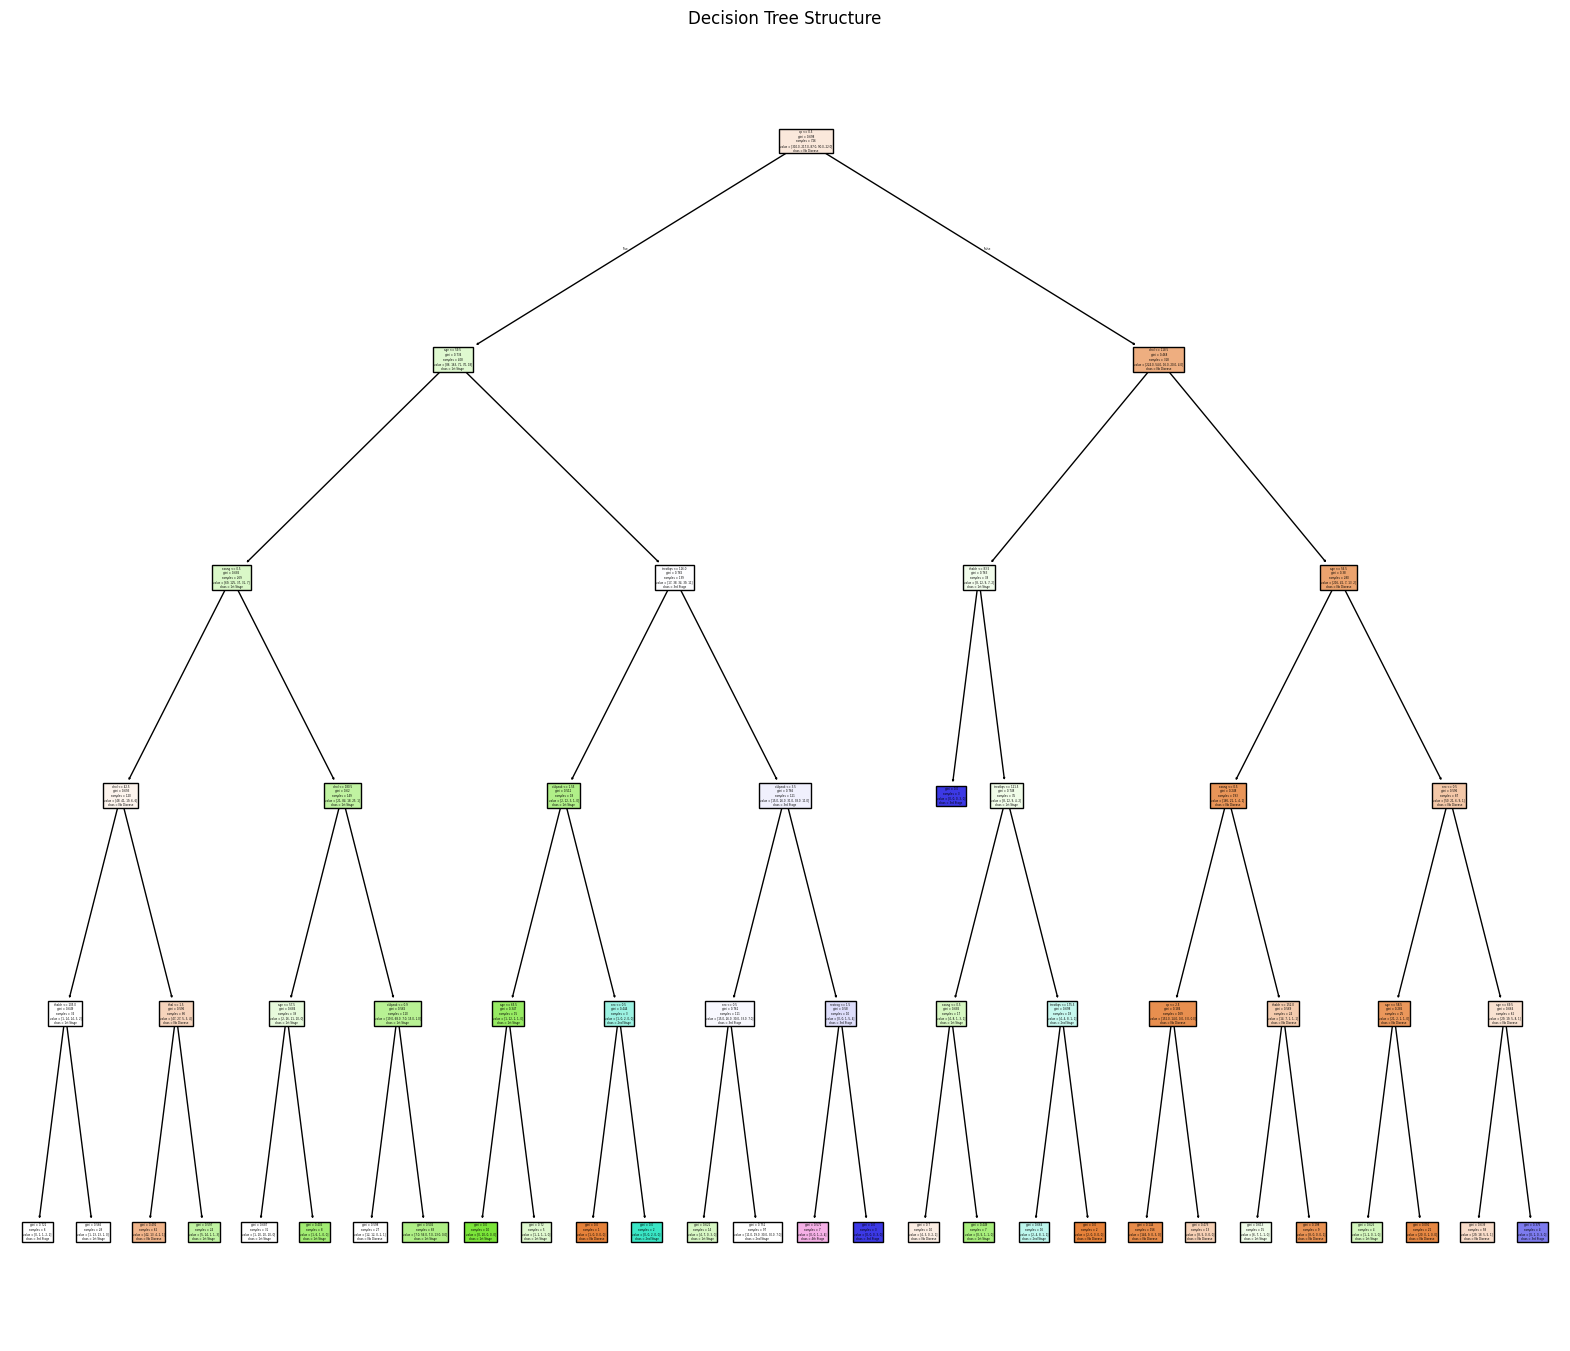

In [149]:
plt.figure(figsize=(20,17))
tree.plot_tree(best_model, feature_names=X.columns, class_names=['No Disease', '1st Stage', '2nd Stage', '3rd Stage', '4th Stage'], filled=True)
plt.title("Decision Tree Structure")
plt.show()

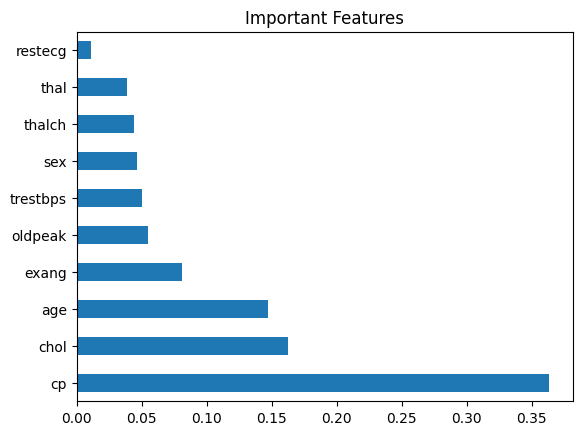

In [150]:
feat_imp = pd.Series(best_model.feature_importances_, index=fn).sort_values(ascending=False)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Important Features")
plt.show()

In [151]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

## GridSearchCV was employed for hyperparameter tuning, and the optimal parameters were determined to be criterion: Gini, Maximum depth: 5, and Minimum samples split: 2

### Interview Questions:

##### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

- Decision Trees have several hyperparameters that significantly impact their performance, generalization ability, and interpretability. The common ones are max_depth, criterion, min_samples_split, min_samples_leaf, max_leaf_nodes, max_features, class_weight, splitter and ccp_alpha.

    - max_depth (Maximum depth of the tree): Limits how deep the tree can go. Helps prevent overfitting.
    - criterion (Function to measure the quality of the split "Gini"/"Entropy"): Affects how the tree decides where to split.
    - min_samples_split (Minimum samples required to split an interval node): Higher values reduce overfitting by forcing the tree to be more conservative.
    - min_samples_leaf (Minimum samples required to be at a leaf node): Ensures each leaf has a minimum number of samples, smoothing the model.
    - max_leaf_nodes (Maximum number of leaf nodes): Puts an upper bound on the number of final leaves.
    - max_features (Number of features to consider when looking for the best split): Helps in randomization and reducing variance.
    - splitter (Strategy used to split nodes: "best" or "random"): "random" adds randomness, "best" is deterministic.
    - class_weight (Weights associated with classes): Useful for imbalanced datasets. Can be set to "balanced".
    - ccp_alpha (Complexity parameter for minimal cost complexity pruning): Used for post-pruning. Removes branches that are not worth the complexity.

##### 2. What is the difference between Label encoding and One-hot encoding? Both Label Encoding and One-Hot Encoding are methods used to convert categorical data into a numerical format, which is essential because most ML models can only work with numbers.

- Label Encoding: Assigns an integer value to each unique category in a column.

    - Pros: Simple and memory efficient.
    - Cons: Can introduce unintended priority.

- One_hot Encoding: Creates a new binary column for each category.

    - Pros: Prevents model from making wrong assumptions about the importance of values.
    - Cons: Can lead to high dimensionality if the categorical column has many unique values.